##### 二值化黑白影像
這篇教學會介紹如何運用 OpenCV 裡的 threshold() 方法，將影像上轉換為二值化的黑白影像，\
進一步使用 adaptiveThreshold() 自適應二值化的方法，產生效果更好的黑白影像。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 什麼是二值化 ( 閾值二進制 )？
二值化又稱為「閾值二進制」( 閾發音 ㄩ、 )，是一種簡單的圖像分割方法，二值化會根據「閾值」( 類似臨界值 ) 進行轉換，\
例如某個像素的灰度值大於閾值，則轉換為黑色，如果這個像素的灰度小於閾值則轉換為白色，進而實現二值化的轉換效果，\
經過二值化轉換的圖片，通常只會剩下黑和白兩個值。

許多影像辨識或影像處理的領域 ( 例如輪廓偵測、邊緣偵測...等 )，都會使用二值化影像進行運算，有些影像處理甚至會先將圖片二值化後，\
再進行後續的計算處理。

##### threshold() 產生黑白影像 
threshold() 方法可以將灰階的影像，以二值化的方式轉換成黑白影像，使用方法如下：

In [ ]:
ret, output = cv2.THRESH_BINARY(img, thresh, maxval, type)
# ret 是否成功轉換，成功 True，失敗 False
# img 來源影像
# thresh 閾值，通常設定 127
# maxval 最大灰度，通常設定 255
# type 轉換方式

threshold() 方法有下列幾種轉換方式，使用 127 和 255 作為說明範例 ( 參考 [cv::ThresholdTypes](https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#gaa9e58d2860d4afa658ef70a9b1115576) )：

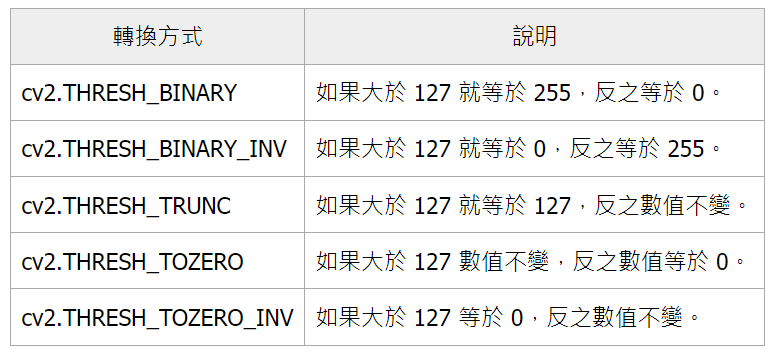

下方的程式執行後，會將一張黑白漸層的圖片，根據不同的轉換方式，轉換成二值化的黑白圖片 ( 注意，轉換前都要先將圖片轉換成灰階色彩 )。

* 範例圖片：[下載連結](https://steam.oxxostudio.tw/download/python/opencv-threshold-gradient.png)

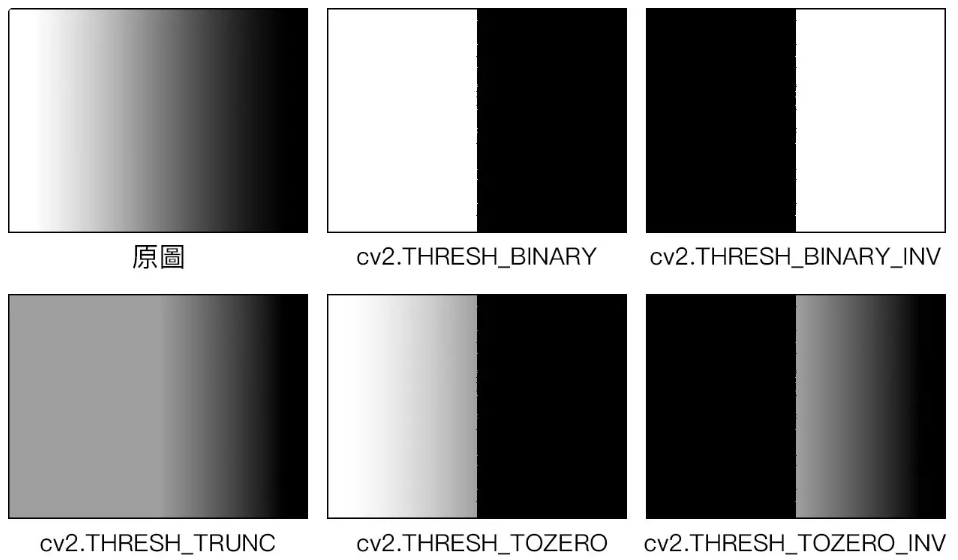

In [ ]:
import cv2
img = cv2.imread('gradient.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY); # 轉換前，都先將圖片轉換成灰階色彩
ret, output1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)     # 如果大於 127 就等於 255，反之等於 0。
ret, output2 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV) # 如果大於 127 就等於 0，反之等於 255。
ret, output3 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)      # 如果大於 127 就等於 127，反之數值不變。
ret, output4 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)     # 如果大於 127 數值不變，反之數值等於 0。
ret, output5 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV) # 如果大於 127 等於 0，反之數值不變。

cv2.imshow('oxxostudio', img)
cv2.imshow('oxxostudio1', output1)
cv2.imshow('oxxostudio2', output2)
cv2.imshow('oxxostudio3', output3)
cv2.imshow('oxxostudio4', output4)
cv2.imshow('oxxostudio5', output5)
cv2.waitKey(0)    # 按下任意鍵停止
cv2.destroyAllWindows()

##### adaptiveThreshold() 自適應二值化 
使用 threshold() 方法轉換灰階的影像時，必須手動設定灰度和閾值，比較適合內容較單純的影像，\
如果遇到內容比較複雜的影像，每個像素間可能都有關連性，這時就可以使用 adaptiveThreshold() 方法，\
進行自適應二值化的轉換，自適應二值化可以根據指定大小的區域平均值，或是整體影像的高斯平均值，\
判斷所需的灰度和閾值，進而產生更好的轉換效果。

adaptiveThreshold() 的使用方法如下：

In [ ]:
cv2.adaptiveThreshold(img, maxValue, adaptiveMethod, thresholdType, blockSize, C)
# img 來源影像
# maxValue 最大灰度，通常設定 255
# adaptiveMethod 自適應二值化計算方法
# thresholdType 二值化轉換方式
# blockSize 轉換區域大小，通常設定 11
# C 偏移量，通常設定 2

使用時 thresholdType 為二值化轉換方式，可以參考上方轉換方式列表，adaptiveMethod 自適應二值化計算方法有兩種，分別是：

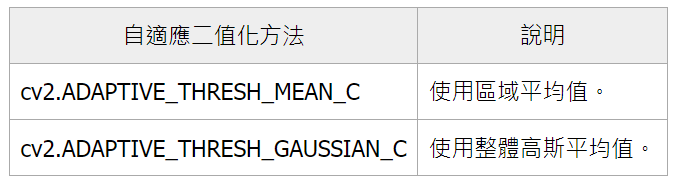

下方的程式執行後，會將一張數獨的照片，根據不同的自適應二值化轉換方式，轉換成黑白圖片 ( 注意，轉換前都要先將圖片轉換成灰階色彩 )。

* 範例圖片：[下載連結](https://steam.oxxostudio.tw/download/python/opencv-threshold-test.jpg)

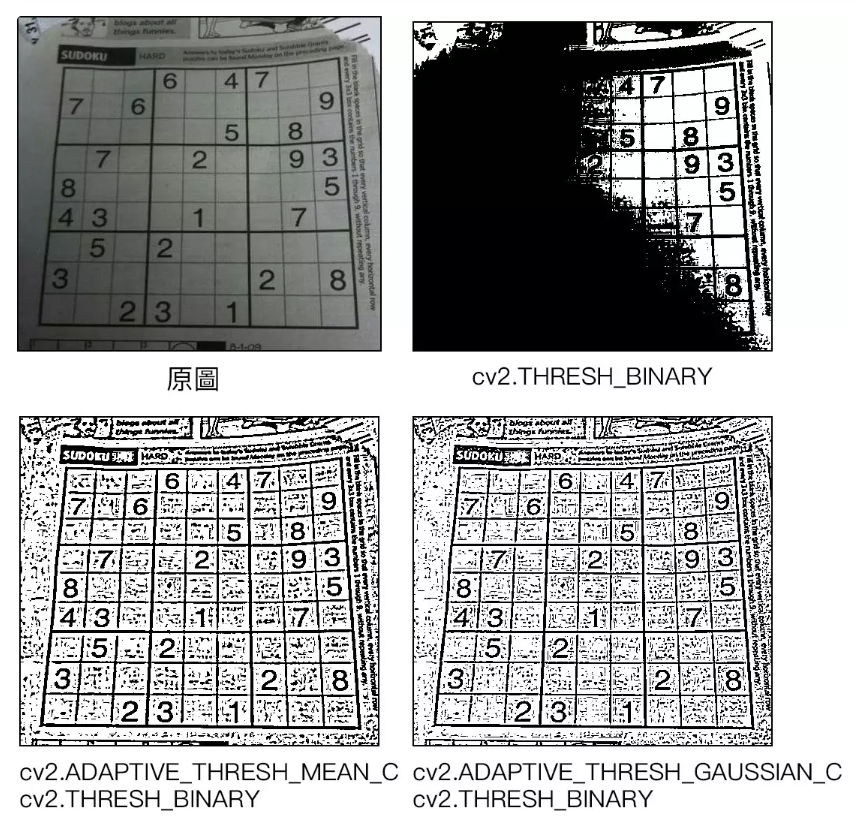

In [1]:
import cv2
img = cv2.imread('meme_1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY); # 轉換前，都先將圖片轉換成灰階色彩
ret, output1 = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)    # 如果大於 127 就等於 255，反之等於 0。
output2 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2) # 平均值計算
output3 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2) # 高斯計算

cv2.imshow('oxxostudio', img)
cv2.imshow('oxxostudio1', output1)
cv2.imshow('oxxostudio2', output2)
cv2.imshow('oxxostudio3', output3)
cv2.waitKey(0)
cv2.destroyAllWindows()

如果要降低圖片的雜訊，可以使用 cv2.medianBlur() 先將圖片模糊化，下方的範例可以看見有模糊化和沒有模糊化的差異：

* 參考：影像模糊化

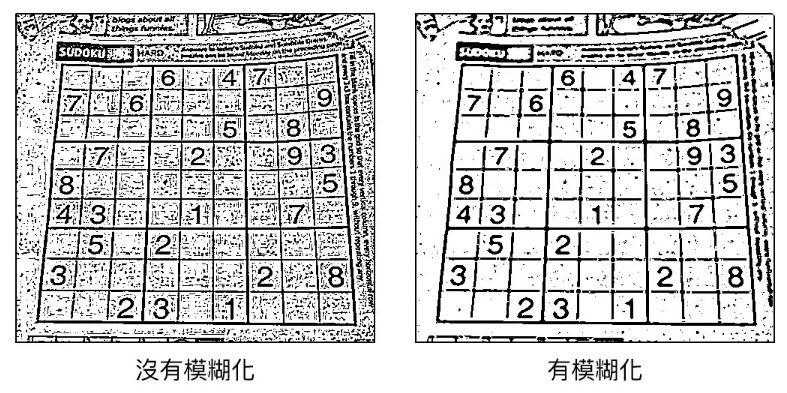

In [2]:
import cv2
img = cv2.imread('meme_1.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY);
output1 = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
img_gray2 = cv2.medianBlur(img_gray, 5)   # 模糊化
output2 = cv2.adaptiveThreshold(img_gray2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

cv2.imshow('oxxostudio1', output1)
cv2.imshow('oxxostudio2', output2)
cv2.waitKey(0)
cv2.destroyAllWindows()

##### 影片的二值化黑白效果 
延伸「[讀取並播放影片](https://steam.oxxostudio.tw/category/python/ai/opencv-read-video.html)」文章的範例，在程式碼中使用自適應二值化方法，就能將電腦鏡頭拍攝的畫面，即時轉換成二值化黑白的影像。

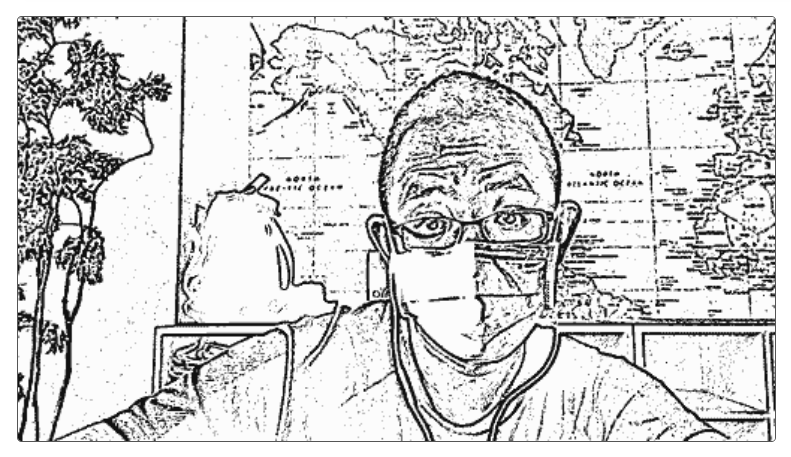

In [ ]:
import cv2
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Cannot receive frame")
        break
    # 套用自適應二值化黑白影像
    img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY);
    img_gray = cv2.medianBlur(img_gray, 5)
    output = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    cv2.imshow('oxxostudio', output)
    if cv2.waitKey(1) == ord('q'):
        break       # 按下 q 鍵停止
cap.release()
cv2.destroyAllWindows()